#### Sample UseCase to send RHESSI limb flare to JHV
S. Laube, FHNW

This is a demo for the [package](https://github.com/Helioviewer-Project/samp4jhv) called samp4jhv. Jhv stands for JHelioviewer, samp is a mechanism to transfer data from an application to another. **You should run JHelioviewer 4.0 or higher.**

The samp4jhv package requires the following installatons:
    - astropy 4.0+
    - sunpy 1.1+
This particular demo further requires:
    - pyvo

In [1]:
# check your installed versions
import astropy  # >= 4.0
import sunpy    # >= 1.1
import pyvo
astropy.__version__, sunpy.__version__, pyvo.__version__

('4.1', '2.0.4', '1.1')

In [2]:
# append project root to sys.path so the samp4jhv module is found correctly
import os
import sys

proj_root = os.path.realpath('../..')  # parent folder of samp4jhv module
if proj_root not in sys.path:
    sys.path.append(proj_root)

import samp4jhv.ext.rhessi as s4j
from samp4jhv import SAMP4JHVClient

In [3]:
service = pyvo.dal.TAPService("https://tap.cs.technik.fhnw.ch/tap")
fields = "granule_uid, x_pos, y_pos, duration, start_time, end_time, access_url, thumbnail_url, active_region, energy, goes_class"
resultset = service.search(f"SELECT {fields} FROM rhessi_flares.epn_core WHERE granule_uid LIKE '%clean' AND limb_flare='true' AND start_time < '2015-12-30'")
resultset

<Table length=7>
 granule_uid   x_pos y_pos duration ... active_region  energy goes_class
                 as    as     s     ...                 keV             
    object     int32 int32  int32   ...     int32      object   object  
-------------- ----- ----- -------- ... ------------- ------- ----------
15120912_clean  -954  -244      624 ...          2466   25-50      C1.2*
15121262_clean  -958   230      296 ...          2470  50-100      C5.2*
15121222_clean  -963   217     1072 ...          2470   25-50       C2.1
15121909_clean  -980    91     3732 ...            --   25-50       C1.7
15122009_clean  -984    78      816 ...          2472 100-300      C3.8*
15122020_clean  -988    15     1860 ...            --   25-50           
15122032_clean  -994     3     1196 ...          2472   12-25       C6.0

In [4]:
print(resultset[-1]['thumbnail_url'])
resultset[-1]['access_url']

https://hesperia.gsfc.nasa.gov/rhessi_extras/flare_images/2015/12/20/20151220_2228_2248/CLEAN/hsi_image_panels_scaled_20151220_2228_2248_13tx3e.jpeg


'https://hesperia.gsfc.nasa.gov/rhessi_extras/imagecube_fits/2015/12/20/20151220_2228_2248/hsi_imagecube_clean_20151220_2228_13tx3e.fits'

In [5]:
# get single sunpy.Maps from image cube -- this might take a while to download the .fits file
maps = s4j.hsi_fits2map(resultset[-1]['access_url'])

In [7]:
# 1. make sure JHV >= 4.0 is running
# 2. send map layers via SAMP to JHV - if many images, increase defer time so JHV can load tmp files before they get deleted
client = SAMP4JHVClient()
for energy_band in maps:
    client.send_image_maps(maps[energy_band])

In [8]:
# JHV needs the maps to be available as files, therefore every single map is saved in a separate temporary file
# Temporary files are usually removed on system restart. If you wish to remove them explicitly, you can call:
client.remove_tmp_files()
# after you closed JHV (or removed the RHESSI layers)

 [sunpy.map.mapbase]


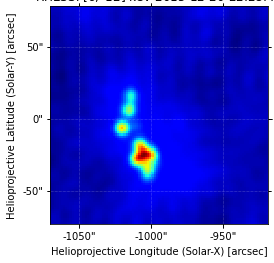

 [sunpy.map.mapbase]


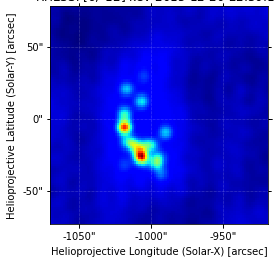

 [sunpy.map.mapbase]


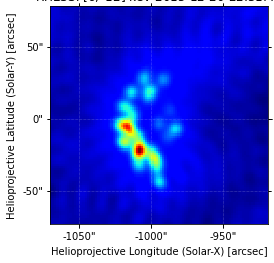

 [sunpy.map.mapbase]


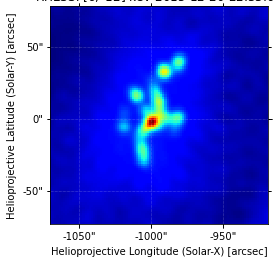

 [sunpy.map.mapbase]


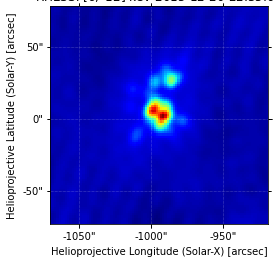

 [sunpy.map.mapbase]


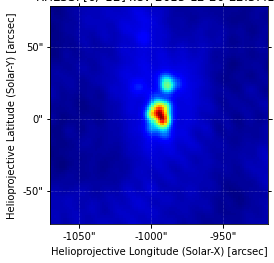

 [sunpy.map.mapbase]


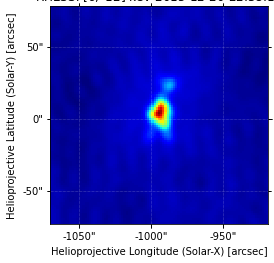

 [sunpy.map.mapbase]


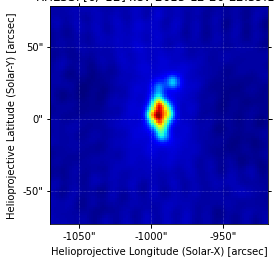

 [sunpy.map.mapbase]


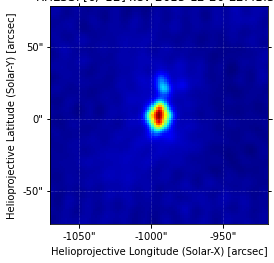

 [sunpy.map.mapbase]


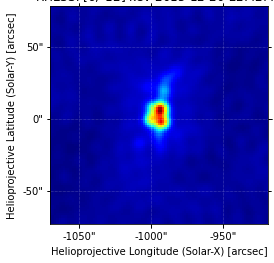

 [sunpy.map.mapbase]


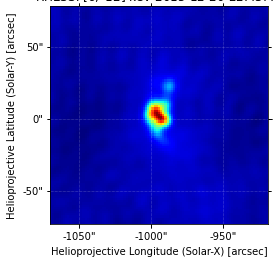

 [sunpy.map.mapbase]


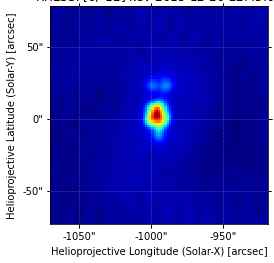

 [sunpy.map.mapbase]


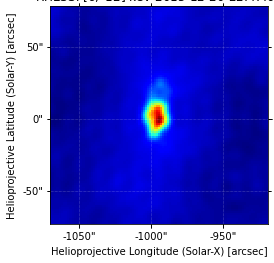

 [sunpy.map.mapbase]


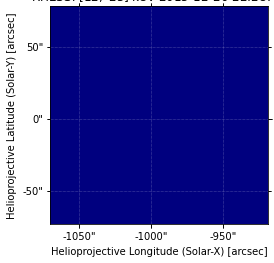

 [sunpy.map.mapbase]


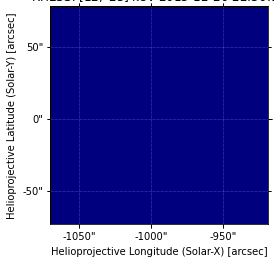

 [sunpy.map.mapbase]


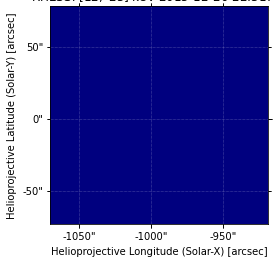

 [sunpy.map.mapbase]


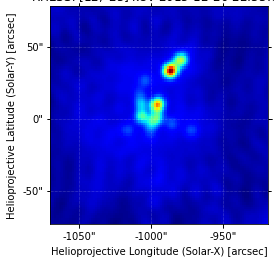

 [sunpy.map.mapbase]


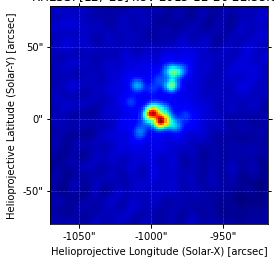

 [sunpy.map.mapbase]


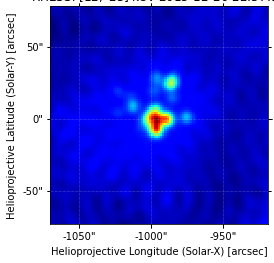

 [sunpy.map.mapbase]


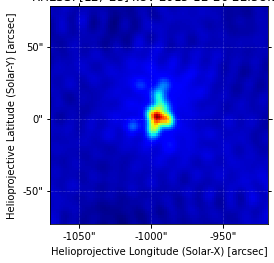

 [sunpy.map.mapbase]


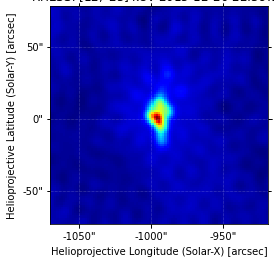

 [sunpy.map.mapbase]


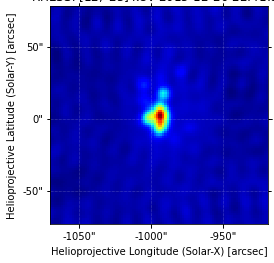

 [sunpy.map.mapbase]


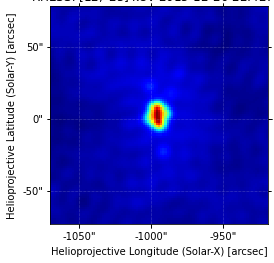

 [sunpy.map.mapbase]


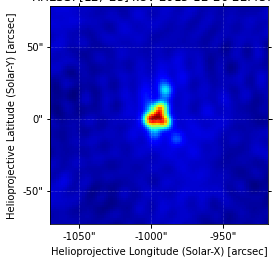

 [sunpy.map.mapbase]


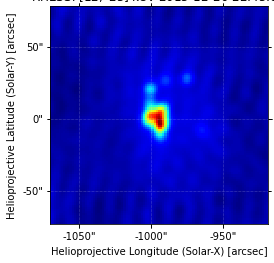

 [sunpy.map.mapbase]


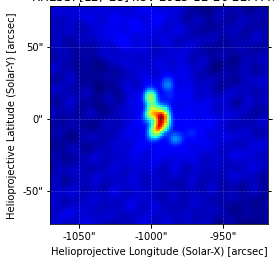

 [sunpy.map.mapbase]


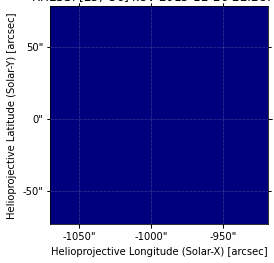

 [sunpy.map.mapbase]


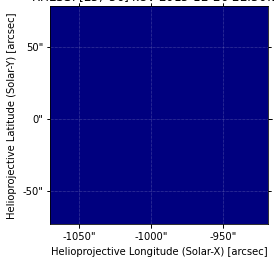

 [sunpy.map.mapbase]


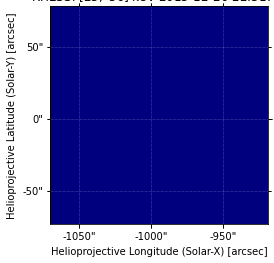

 [sunpy.map.mapbase]


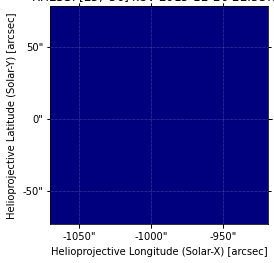

 [sunpy.map.mapbase]


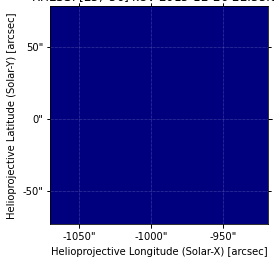

 [sunpy.map.mapbase]


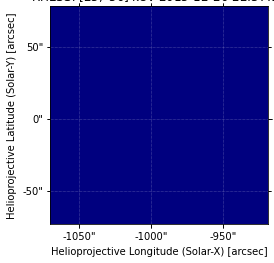

 [sunpy.map.mapbase]


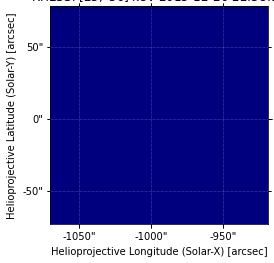

 [sunpy.map.mapbase]


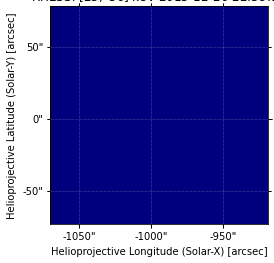

 [sunpy.map.mapbase]


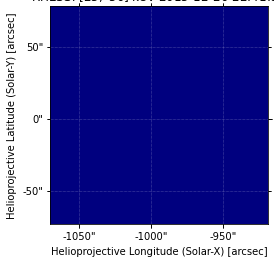

 [sunpy.map.mapbase]


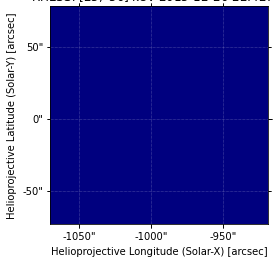

 [sunpy.map.mapbase]


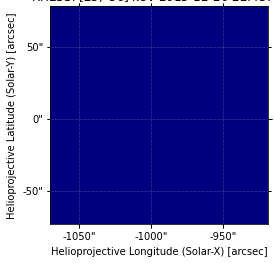

 [sunpy.map.mapbase]


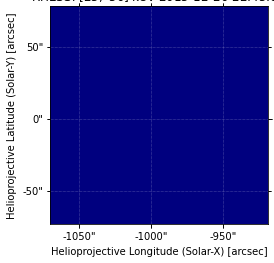

 [sunpy.map.mapbase]


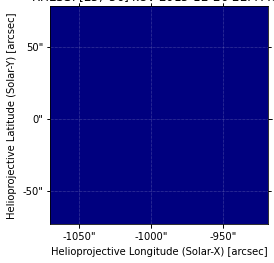

In [9]:
# if you want, you can also preview the maps here:
import matplotlib.pyplot as plt
for energy_band in maps:
    for i in range(len(maps[energy_band])):
        plt.figure()
        maps[energy_band][i].plot()
        plt.show()